In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit=pd.read_csv("tmdb_5000_credits.csv")
movie=pd.read_csv("tmdb_5000_movies.csv")

In [3]:
movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
movie.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
credit.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [6]:
credit.head(1)

,Unnamed: 0,movie_id,title,cast,crew
0,0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
movie=movie.merge(credit,on="title")

In [8]:
movie.shape

(4809, 24)

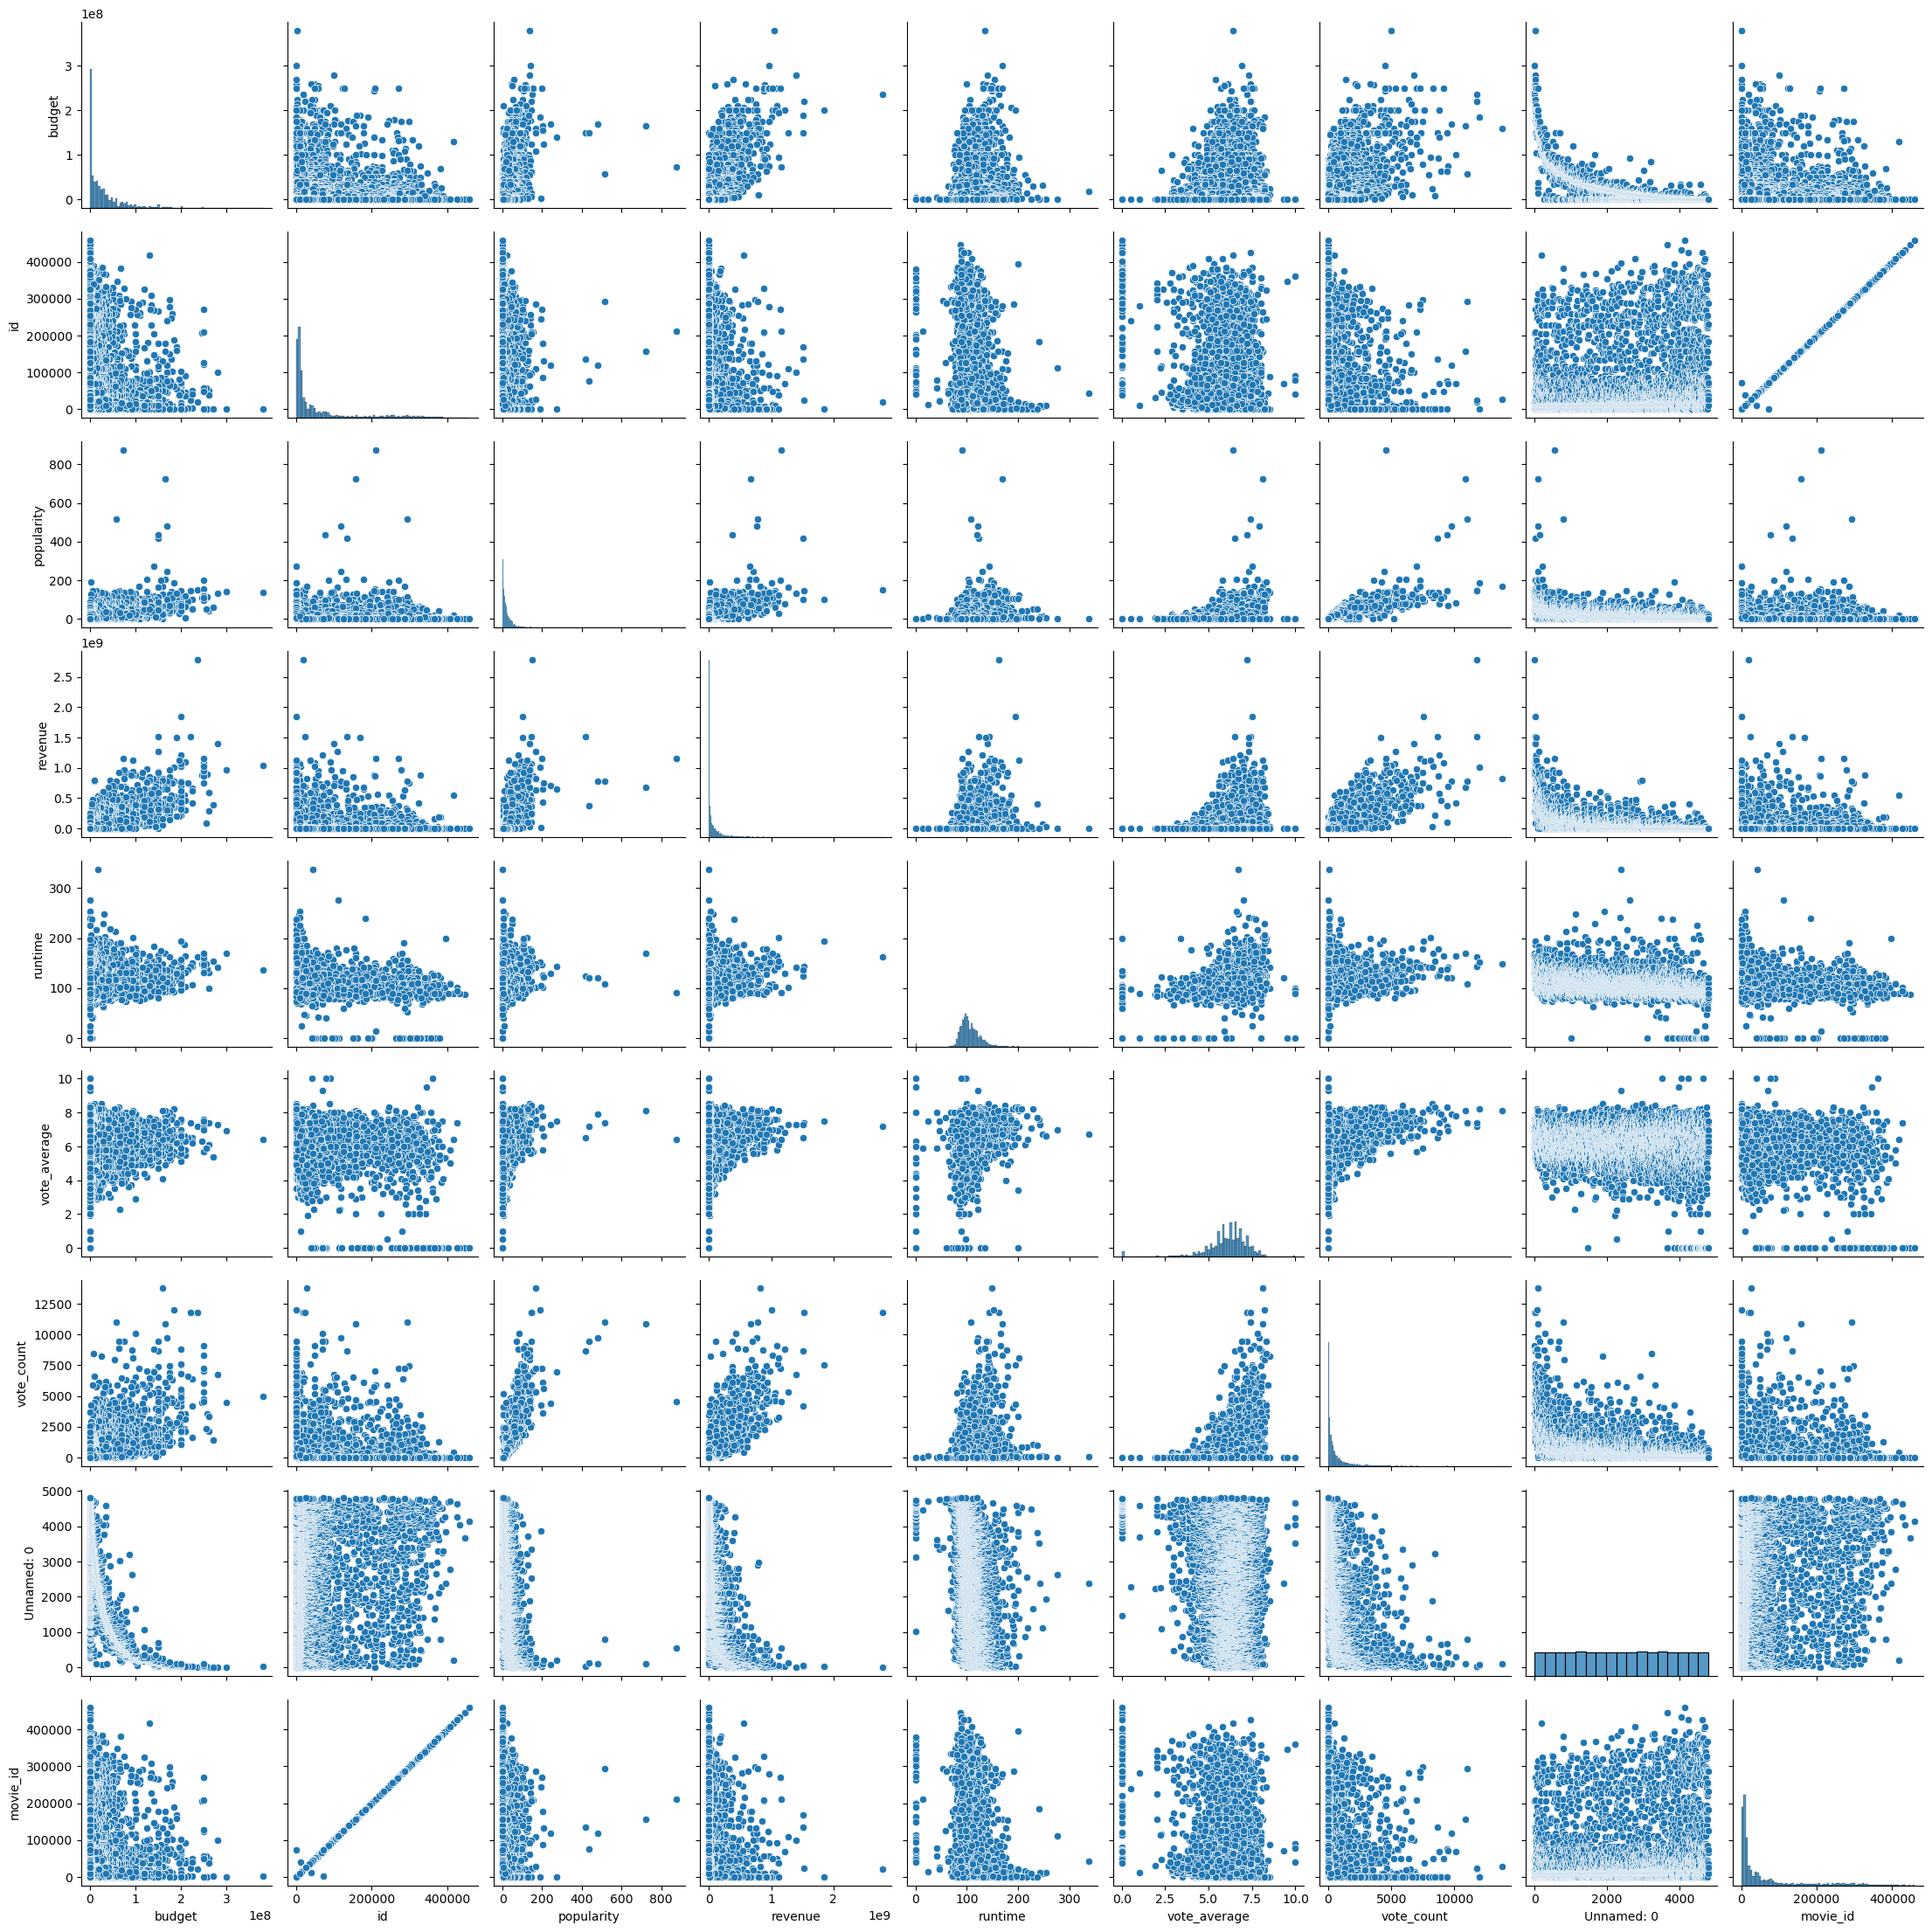

In [9]:
sns.pairplot(movie)

In [10]:
movie['original_language'].value_counts()

en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

<Axes: >

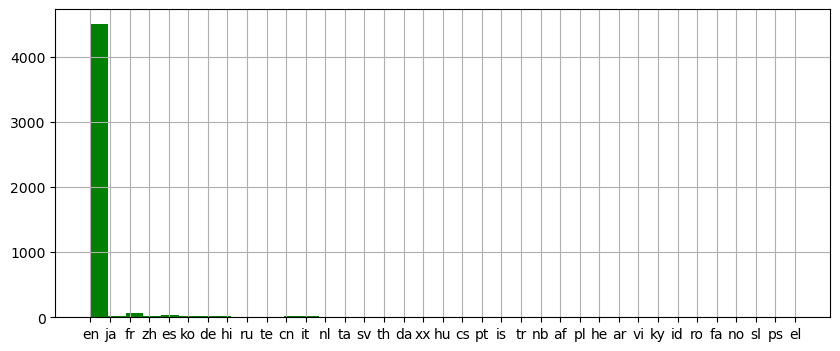

In [11]:
movie['original_language'].hist(color='green',bins=40,figsize=(10,4))

In [12]:
movie=movie[['movie_id','title','overview','genres','keywords','cast','crew','vote_average']]

In [13]:
movie.rename(columns={'vote_average':'Rating'},inplace=True)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\384351857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie.rename(columns={'vote_average':'Rating'},inplace=True)


In [14]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [15]:
movie.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
Rating      0
dtype: int64

In [16]:
movie.dropna(inplace=True)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\4265595405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie.dropna(inplace=True)


In [17]:
movie.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
Rating      0
dtype: int64

In [18]:
movie.duplicated().sum()

0

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\268988815.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movie.corr())


<Axes: >

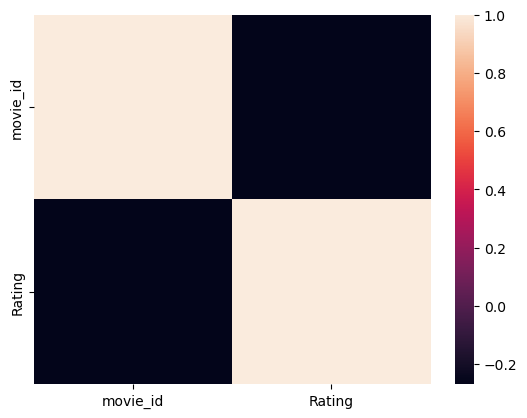

In [19]:
sns.heatmap(movie.corr())

<Axes: >

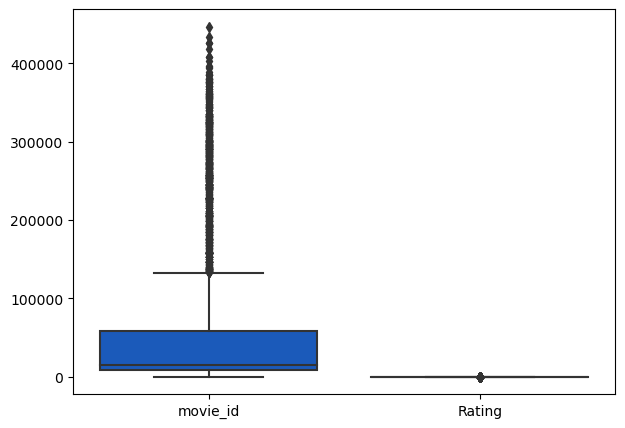

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(data=movie,palette='winter')

In [21]:
movie.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [22]:
import ast
def convert(obj):
    li=[]
    for i in ast.literal_eval(obj):
        li.append(i['name'])
    return li

In [23]:
movie['genres']=movie['genres'].apply(convert)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\3824845044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['genres']=movie['genres'].apply(convert)


In [24]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


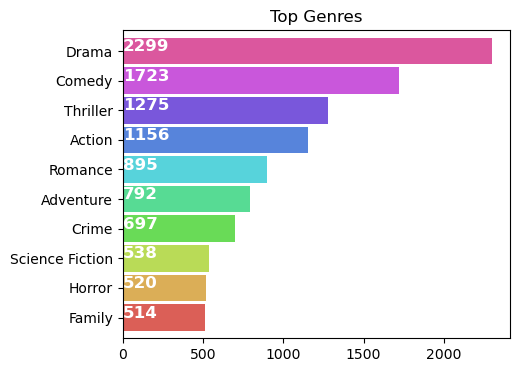

In [25]:
plt.subplots(figsize=(5,4))
list1 = []
for i in movie['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [26]:
movie.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [27]:
movie['keywords']=movie['keywords'].apply(convert)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\302776746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['keywords']=movie['keywords'].apply(convert)


In [28]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [29]:
movie['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [30]:
import ast
def convert3(obj):
    li=[]
    count=0
    for i in ast.literal_eval(obj):
        if count!=3:
            li.append(i['name'])
            count+=1
        else:
            break
    return li

In [31]:
movie['cast'].apply(convert3)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [32]:
movie['cast']=movie['cast'].apply(convert3)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\1776432986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['cast']=movie['cast'].apply(convert3)


In [33]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


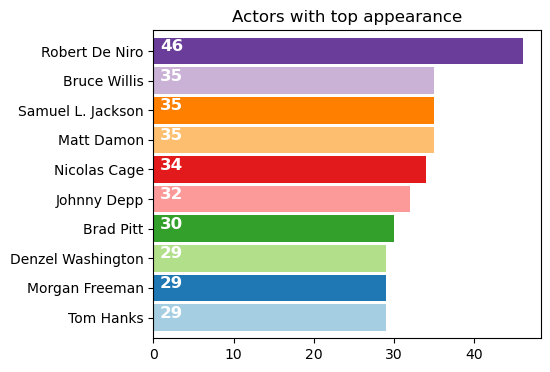

In [34]:
plt.subplots(figsize=(5,4))
list1 = []
for i in movie['cast']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Paired',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Actors with top appearance')
plt.show()

In [35]:
import ast
def fetch_director(obj):
    li=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            li.append(i['name'])
            break
    return li

In [36]:
movie['crew']=movie['crew'].apply(fetch_director)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\3259542168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['crew']=movie['crew'].apply(fetch_director)


In [37]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],6.9
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],6.3
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],7.6
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],6.1


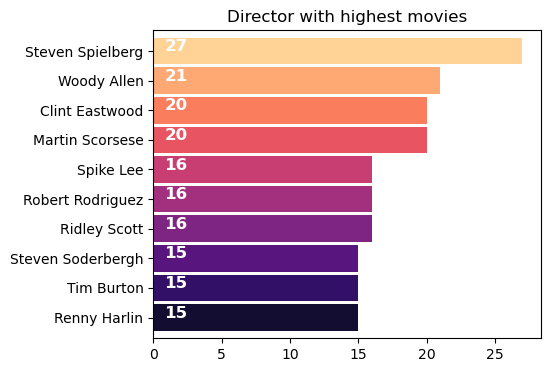

In [38]:
plt.subplots(figsize=(5,4))
list1 = []
for i in movie['crew']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('magma',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Director with highest movies')
plt.show()

In [39]:
movie['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [40]:
movie['overview']=movie['overview'].apply(lambda x:x.split())

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\2760930520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['overview']=movie['overview'].apply(lambda x:x.split())


In [41]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],7.2
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],6.9
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],6.3
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],7.6
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],6.1


In [42]:
movie['genres'].apply(lambda x:[i.replace(" ","")for i in x])

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4804                       [Action, Crime, Thriller]
4805                               [Comedy, Romance]
4806               [Comedy, Drama, Romance, TVMovie]
4807                                              []
4808                                   [Documentary]
Name: genres, Length: 4806, dtype: object

In [43]:
movie['genres']=movie['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movie['keywords']=movie['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movie['cast']=movie['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movie['crew']=movie['crew'].apply(lambda x:[i.replace(" ","")for i in x])

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\3092209802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['genres']=movie['genres'].apply(lambda x:[i.replace(" ","")for i in x])
C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\3092209802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['keywords']=movie['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\3092209802.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [44]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],7.2
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],6.9
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],6.3
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],7.6
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],6.1


In [45]:
movie['tag']=movie['overview']+movie['genres']+movie['keywords']+movie['cast']+movie['crew']

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\275208242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['tag']=movie['overview']+movie['genres']+movie['keywords']+movie['cast']+movie['crew']


In [46]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,Rating,tag
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],7.2,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],6.9,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],6.3,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],7.6,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],6.1,"[John, Carter, is, a, war-weary,, former, mili..."


In [47]:
new=movie[['movie_id','title','Rating','tag']]
new

,movie_id,title,Rating,tag
0,19995,Avatar,7.2,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,6.9,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,6.3,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,7.6,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,6.1,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...
4804,9367,El Mariachi,6.6,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,5.9,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered",7.0,"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,5.7,"[When, ambitious, New, York, attorney, Sam, is..."


In [48]:
new['tag'].apply(lambda x:" ".join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tag, Length: 4806, dtype: object

In [49]:
new['tag']=new['tag'].apply(lambda x:" ".join(x))

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\1604157636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tag']=new['tag'].apply(lambda x:" ".join(x))


In [50]:
new.head()

,movie_id,title,Rating,tag
0,19995,Avatar,7.2,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,6.9,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,6.3,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,7.6,Following the death of District Attorney Harve...
4,49529,John Carter,6.1,"John Carter is a war-weary, former military ca..."


In [51]:
new['tag'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [52]:
new['tag'].apply(lambda x:x.lower())

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4804    el mariachi just wants to play his guitar and ...
4805    a newlywed couple's honeymoon is upended by th...
4806    "signed, sealed, delivered" introduces a dedic...
4807    when ambitious new york attorney sam is sent t...
4808    ever since the second grade when he first saw ...
Name: tag, Length: 4806, dtype: object

In [53]:
new['tag']=new['tag'].apply(lambda x:x.lower())

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\3017425405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tag']=new['tag'].apply(lambda x:x.lower())


In [54]:
new.head()

,movie_id,title,Rating,tag
0,19995,Avatar,7.2,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,6.9,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,6.3,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,7.6,following the death of district attorney harve...
4,49529,John Carter,6.1,"john carter is a war-weary, former military ca..."


In [55]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [56]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [57]:
new['tag']=new['tag'].apply(stem)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\658393497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tag']=new['tag'].apply(stem)


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000,stop_words="english")

In [59]:
cv.fit_transform(new['tag']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
cv.fit_transform(new['tag']).toarray().shape

(4806, 1000)

In [61]:
vector=cv.fit_transform(new['tag']).toarray()

In [62]:
vector[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
cv.get_feature_names_out()

array(['000', '10', '1950', '1970', '3d', 'abandon', 'abus', 'accept',
       'accid', 'accident', 'act', 'action', 'actor', 'actual', 'adapt',
       'addict', 'adopt', 'adulteri', 'adventur', 'affair', 'affect',
       'africa', 'african', 'aftercreditssting', 'age', 'agent', 'ago',
       'agre', 'aid', 'airplan', 'alcohol', 'alex', 'alien', 'alive',
       'alli', 'allow', 'alway', 'america', 'american', 'ancient',
       'angel', 'angeles', 'ani', 'anim', 'anoth', 'answer', 'anyth',
       'apart', 'apocalypt', 'appear', 'arm', 'armi', 'arrest', 'arriv',
       'art', 'artist', 'ask', 'aspir', 'assassin', 'assign', 'assist',
       'astronaut', 'attack', 'attempt', 'attract', 'author', 'away',
       'babi', 'bad', 'band', 'bank', 'bar', 'base', 'basebal',
       'basedoncomicbook', 'basedonnovel', 'basedontruestori',
       'basedonyoungadultnovel', 'basketbal', 'battl', 'beach', 'bear',
       'beat', 'beauti', 'becaus', 'becom', 'befor', 'befriend', 'begin',
       'believ', 'b

In [64]:
len(cv.get_feature_names_out())

1000

In [65]:
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
similarity=cosine_similarity(vector)
similarity

array([[1.        , 0.14638501, 0.14285714, ..., 0.07079923, 0.        ,
        0.        ],
       [0.14638501, 1.        , 0.09759001, ..., 0.03627381, 0.        ,
        0.0438529 ],
       [0.14285714, 0.09759001, 1.        , ..., 0.03539962, 0.        ,
        0.        ],
       ...,
       [0.07079923, 0.03627381, 0.03539962, ..., 1.        , 0.06243905,
        0.06362848],
       [0.        , 0.        , 0.        , ..., 0.06243905, 1.        ,
        0.15097027],
       [0.        , 0.0438529 , 0.        , ..., 0.06362848, 0.15097027,
        1.        ]])

In [68]:
similarity.shape

(4806, 4806)

In [69]:
new[new['title']=='Batman Begins'].index[0]

119

In [70]:
new['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4804                                 El Mariachi
4805                                   Newlyweds
4806                   Signed, Sealed, Delivered
4807                            Shanghai Calling
4808                           My Date with Drew
Name: title, Length: 4806, dtype: object

In [71]:
new.head(2)

,movie_id,title,Rating,tag
0,19995,Avatar,7.2,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,6.9,"captain barbossa, long believ to be dead, ha c..."


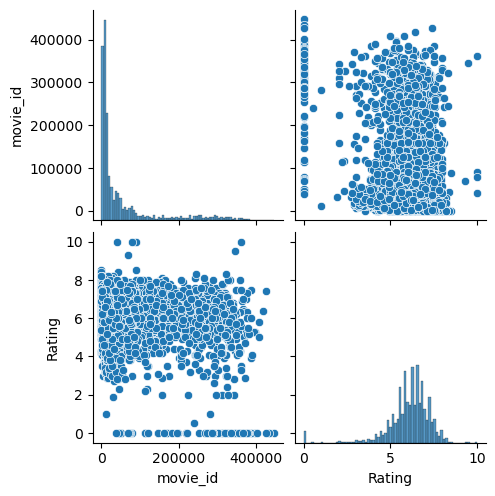

In [72]:
sns.pairplot(new)

In [73]:
list(enumerate(similarity[0]))

[(0, 1.0000000000000002),
 (1, 0.14638501094227996),
 (2, 0.14285714285714288),
 (3, 0.13977131156292244),
 (4, 0.2939723678960656),
 (5, 0.21821789023599242),
 (6, 0.07597371763975865),
 (7, 0.20261022461827694),
 (8, 0.09304842103984708),
 (9, 0.16208817969462155),
 (10, 0.1543033499620919),
 (11, 0.14547859349066158),
 (12, 0.15018785229652765),
 (13, 0.0681598176590997),
 (14, 0.20619652471058064),
 (15, 0.11572751247156893),
 (16, 0.13650472655798704),
 (17, 0.20982172726556325),
 (18, 0.14204774743178405),
 (19, 0.17118419700436519),
 (20, 0.08518354199999201),
 (21, 0.17817416127494962),
 (22, 0.12104550653376049),
 (23, 0.15018785229652765),
 (24, 0.09100315103865803),
 (25, 0.06172133998483677),
 (26, 0.24313226954193232),
 (27, 0.3144854510165755),
 (28, 0.17817416127494962),
 (29, 0.10762440050012628),
 (30, 0.11065666703449761),
 (31, 0.2253744679276044),
 (32, 0.14969623771302393),
 (33, 0.15877683720748895),
 (34, 0.0),
 (35, 0.18156825980064073),
 (36, 0.2245443565695359

In [74]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

[(0, 1.0000000000000002),
 (507, 0.5039526306789696),
 (1216, 0.43355498476205995),
 (151, 0.3947710169758614),
 (1194, 0.3944053188733077),
 (539, 0.39279220242478635),
 (61, 0.3818813079129867),
 (1204, 0.35273781075132926),
 (1920, 0.34718253741470684),
 (74, 0.3471825374147068),
 (4048, 0.3438409530367517),
 (305, 0.34188172937891387),
 (2786, 0.34156502553198664),
 (322, 0.3415650255319866),
 (172, 0.3380617018914066),
 (4192, 0.3380617018914066),
 (2333, 0.33681653485430385),
 (778, 0.3289758474798845),
 (1329, 0.3273268353539886),
 (577, 0.3256694736394648),
 (972, 0.3256694736394648),
 (973, 0.3256694736394648),
 (2971, 0.3183035070396152),
 (1444, 0.314970394174356),
 (27, 0.3144854510165755),
 (208, 0.3086066999241838),
 (3675, 0.3038948705590346),
 (1321, 0.30261376633440124),
 (2999, 0.30261376633440124),
 (67, 0.3003757045930553),
 (495, 0.3003757045930553),
 (1089, 0.29773257907842177),
 (4, 0.2939723678960656),
 (91, 0.29277002188455997),
 (220, 0.29277002188455997),
 (1

In [75]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(507, 0.5039526306789696),
 (1216, 0.43355498476205995),
 (151, 0.3947710169758614),
 (1194, 0.3944053188733077),
 (539, 0.39279220242478635)]

In [76]:
import operator
import matplotlib.pyplot as plt
import seaborn as sns

def recommend():
    name = input('Enter a movie title: ')
    index = new[new['title'] == name].index[0]
    new_movie = new[new['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ', new_movie.title.values[0])
    print(f'The actual rating for {new_movie["title"].values[0]} is {float(new_movie["Rating"]):.2f}')
    
    print('\nRecommended Movies:')

    def getNeighbors(baseMovie, K):
        distances = []
        distance = similarity[index]
        neighbors = []

        for x in range(K):
            neighbors = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1:6]
        return neighbors

    K = 5
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    recommended_movies = []
    recommended_ratings = []

    for x in range(K):
        if x < len(neighbors):
            movie_id = new.iloc[neighbors[x][0]][0]
            print("\nmovie_id :",movie_id)
            
            #avgRating += new.iloc[neighbors[x][0]][2]
            movie_title = new.iloc[neighbors[x][0]][1]
            movie_rating = new.iloc[neighbors[x][0]][2]
            print(f"{movie_title} | Rating: {movie_rating}")
            
            recommended_movies.append(movie_title)
            recommended_ratings.append(movie_rating)
        else:
            break

    
    plt.figure(figsize=(4, 2))
    sns.barplot(x=recommended_ratings, y=recommended_movies, palette="plasma")
    plt.xlabel("Ratings")
    plt.title("Recommended Movies")
    plt.show()

    #print('\n')
    #avgRating = avgRating / K
    #print(f'The predicted rating for {new_movie["title"].values[0]} is: {avgRating:.2f}')
    #print(f'The actual rating for {new_movie["title"].values[0]} is {float(new_movie["Rating"]):.2f}')

Enter a movie title: Avatar
Selected Movie:  Avatar
The actual rating for Avatar is 7.20

Recommended Movies:

movie_id : 602
Independence Day | Rating: 6.7

movie_id : 440
Aliens vs Predator: Requiem | Rating: 4.9

movie_id : 2310
Beowulf | Rating: 5.5

movie_id : 11551
Small Soldiers | Rating: 6.2

movie_id : 7450
Titan A.E. | Rating: 6.3


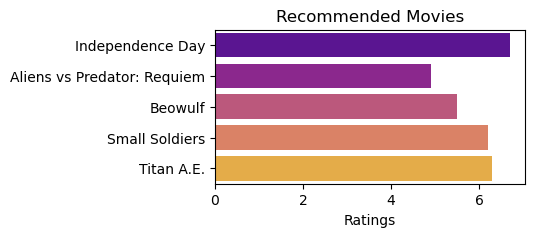

In [77]:
recommend()

In [78]:
new['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

C:\Users\Smrity\AppData\Local\Temp\ipykernel_12320\1355053958.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movie.corr().abs(),annot=True)


<Axes: >

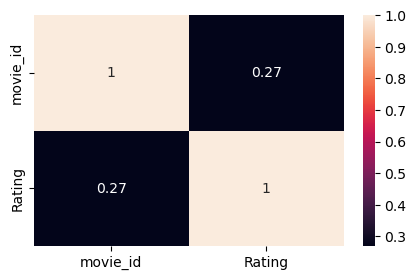

In [79]:
plt.figure(figsize=(5,3))
sns.heatmap(movie.corr().abs(),annot=True)